In [ ]:
import io
from google.colab import drive
# uploaded = files.upload()

# df = pd.read_csv(io.BytesIO(uploaded['ShareChat-IndoML-Datathon-NSFW-CommentChallenge_Train.csv'])) 

drive.mount('/content/drive')

Mounted at /content/drive




---



In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/readytomodel1.csv')

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,CommentId,commentText,language,user_index,post_index,report_count_comment,report_count_post,like_count_comment,like_count_post,label,commenttranslated,commenttokenize,preprocessed,tokenized,preprocessed2
0,0,1,2,apni pant utar kar apni chut bhi to bata do ma...,Urdu,1205.0,17327.0,0.0,1.0,0.0,731.0,1.0,Take pants tell pussy fair madam,"['Take', 'pants', 'tell', 'pussy', 'fair', 'ma...",take pant tell pussi fair madam,"['take', 'pant', 'tell', 'pussi', 'fair', 'mad...",take pant tell pussi fair madam
1,1,2,3,krishnatripathi4578 jesi ghar ki sabhyata vais...,Rajasthani,889.0,352919.0,0.0,1.0,1.0,285.0,0.0,Culture house like Krishnatripathi,"['Culture', 'house', 'like', 'Krishnatripathi']",cultur hous like krishnatripathi,"['cultur', 'hous', 'like', 'krishnatripathi']",cultur hous like krishnatripathi
2,2,3,4,is randi ko dusra kaam nahi hai kuttiya kahin ki,Urdu,372.0,261223.0,0.0,0.0,0.0,453.0,1.0,This scoundrel work kutiya,"['This', 'scoundrel', 'work', 'kutiya']",thi scoundrel work kutiya,"['thi', 'scoundrel', 'work', 'kutiya']",thi scoundrel work kutiya
3,3,5,6,good night di very nice 👌👌👌👌,Assamese,2080.0,546475.0,0.0,0.0,1.0,229.0,0.0,good night di nice,"['good', 'night', 'di', 'nice']",good night di nice,"['good', 'night', 'di', 'nice']",good night di nice
4,4,8,9,chinaal raand,Urdu,2051.0,597836.0,0.0,0.0,0.0,262.0,1.0,chinal rand,"['chinal', 'rand']",chinal rand,"['chinal', 'rand']",chinal rand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735930,735930,936651,1350063,bala na pura ଧାବେଡି,Odia,14771.0,264305.0,0.0,0.0,0.0,14.0,1.0,bala na pura,"['bala', 'na', 'pura']",bala na pura,"['bala', 'na', 'pura']",bala pura
735931,735931,936652,1350064,ilove you 💗❤️♥️💘💕💗❤️❤️♥️💚 💘💘💘💘💘💘💘💘💘💘🌹🌹🌹🌹🌹💞💞💞💞💞💞💞,Odia,28689.0,357848.0,0.0,0.0,0.0,14.0,0.0,ilove,['ilove'],ilov,['ilov'],ilov
735932,735932,936653,1350065,abisek,Odia,19607.0,934737.0,0.0,4.0,0.0,14.0,0.0,abisek,['abisek'],abisek,['abisek'],abisek
735933,735933,936654,1350066,nyc..vedeo..nd..esara..lovely..smile..so..⚘swe...,Odia,13717.0,850336.0,0.0,0.0,0.0,14.0,0.0,nycvedeondesaralovelysmilesosweetallook,['nycvedeondesaralovelysmilesosweetallook'],nycvedeondesaralovelysmilesosweetallook,['nycvedeondesaralovelysmilesosweetallook'],nycvedeondesaralovelysmilesosweetallook


In [ ]:
import pandas as panda
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt
import time # for timing
import seaborn as sns
from gensim.models import KeyedVectors # for pre-trained embedding 


# metrics for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# sklearn classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter
from sklearn import metrics, utils, model_selection, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, classification_report

import tensorflow as tf # for neural networks

#**Tfidf Vectorization**

In [ ]:
#TF-IDF Features-F1
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['preprocessed2'] )
tfidf


<735935x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 3177392 stored elements in Compressed Sparse Row format>

#**Logistic Regression**

In [ ]:
X = tfidf
y = df['label'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model = LogisticRegression(max_iter=1000).fit(X_train_tfidf,y_train)
y_preds = model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)


              precision    recall  f1-score   support

           0       0.92      0.96      0.94    108561
           1       0.88      0.77      0.82     38626

    accuracy                           0.91    147187
   macro avg       0.90      0.87      0.88    147187
weighted avg       0.91      0.91      0.91    147187

Logistic Regression, Accuracy Score: 0.912254478996107


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
confusion_matrix

array([[104643,   3918],
       [  8997,  29629]])

Text(0.5, 257.44, 'Predicted label')

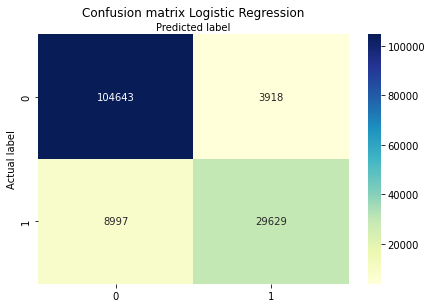

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#**Naive Bayes**

In [ ]:
baseline_bayes = MultinomialNB(alpha = .01)


In [ ]:
%%time
baseline_bayes.fit(X_train_tfidf, y_train)
bayes_test_preds = baseline_bayes.predict(X_test_tfidf)


CPU times: user 155 ms, sys: 3.53 ms, total: 159 ms
Wall time: 160 ms


In [ ]:
bayes_precision = precision_score(y_test, bayes_test_preds)
bayes_recall = recall_score(y_test, bayes_test_preds)
bayes_f1_score = f1_score(y_test, bayes_test_preds)
bayes_f1_weighted = f1_score(y_test, bayes_test_preds, average='weighted')

# printing scores
# helpers.evaluation(bayes_precision, bayes_recall, bayes_f1_score, bayes_f1_weighted)


In [ ]:
def evaluation(precision, recall, f1_score, f1_weighted):
    """prints out evaluation metrics for a model"""
    print('Testing Set Evaluation Metrics:')
    print('Precision: {:.4}'.format(precision))
    print('Recall: {:.4}'.format(recall))
    print('F1 Score: {:.4}'.format(f1_score))
    print('Weighted F1 Score: {:.4}'.format(f1_weighted))

In [ ]:
bayesacc=accuracy_score(y_test,bayes_test_preds)


In [ ]:
evaluation(bayes_precision, bayes_recall, bayes_f1_score, bayes_f1_weighted)

Testing Set Evaluation Metrics:
Precision: 0.7858
Recall: 0.795
F1 Score: 0.7904
Weighted F1 Score: 0.8895


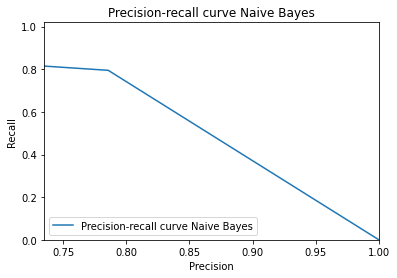

In [ ]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(y_test, bayes_test_preds)

# create plot
plt.plot(precision, recall, label='Precision-recall curve Naive Bayes')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve Naive Bayes')
_ = plt.xlim([0.735, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower left")

# save figure
plt.savefig('precision_recall.png', dpi=200)

#**SVM**

In [ ]:
support =LinearSVC(random_state=20)
support.fit(X_train_tfidf,y_train)
y_preds = support.predict(X_test_tfidf)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" , acc3)


              precision    recall  f1-score   support

           0       0.92      0.96      0.94    108561
           1       0.88      0.77      0.82     38626

    accuracy                           0.91    147187
   macro avg       0.90      0.87      0.88    147187
weighted avg       0.91      0.91      0.91    147187

SVM, Accuracy Score: 0.9127980052586165


In [ ]:
confusion_matrix_SVM = confusion_matrix(y_test,y_preds)
confusion_matrix_SVM

array([[104533,   4028],
       [  8807,  29819]])

Text(0.5, 257.44, 'Predicted label')

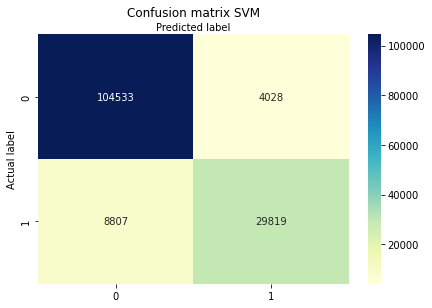

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_SVM), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#**KNN**

In [ ]:
def evaluateModel(y_test, predicted):
    """evaluates trained model"""
    acc = accuracy_score(y_test, predicted) # accuracy
    print("\nAccuracy with validation data: %4.2f%%" %(100*acc))
    print("\nClassification report:\n")
    print(classification_report(y_test, predicted)) 
    cm = confusion_matrix(y_test, predicted) # confusion_matrix
    print("\nConfusion matrix:\n")
    print(pd.DataFrame(cm))
    return acc

models = {} # dictionary of Scikit-Learn classifiers with non-default parameters 
models['KNN'] = KNeighborsClassifier(n_neighbors=3)

result = []
for m in [m for m in models]:
    modelKNN = models[m] # model to use
    print("\nTraining classifier %s:\n%s" %(m, modelKNN))
    st = time.time() # start time for training and testing
    modelKNN.fit(X_train_tfidf, y_train) # train model
    predictedKNN = modelKNN.predict(X_test_tfidf) # predict test labels with trained modelc
    t = time.time() - st # time to train and test model
    print("Time to train and test classifier: %4.2f seconds" %(t))
    accKNN = evaluateModel(y_test, predictedKNN) # evaluate prediction accuracy
    result.append([m, accKNN]) # record results
    print(60*'=') # end training and testing for model


Training classifier KNN:
KNeighborsClassifier(n_neighbors=3)
Time to train and test classifier: 1301.32 seconds

Accuracy with validation data: 84.29%

Classification report:

              precision    recall  f1-score   support

           0       0.85      0.96      0.90    108561
           1       0.82      0.52      0.63     38626

    accuracy                           0.84    147187
   macro avg       0.83      0.74      0.77    147187
weighted avg       0.84      0.84      0.83    147187


Confusion matrix:

        0      1
0  104164   4397
1   18733  19893


In [ ]:
cmknn = confusion_matrix(y_test, predictedKNN)

Text(0.5, 257.44, 'Predicted label')

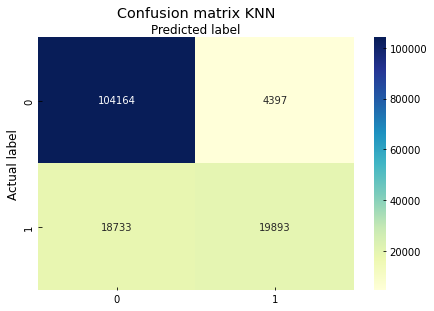

In [ ]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cmknn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix KNN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
KNNacc=accuracy_score(y_test,predicted)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(y_test, predicted)
    roc_auc[i] = auc(fpr[i], tpr[i])

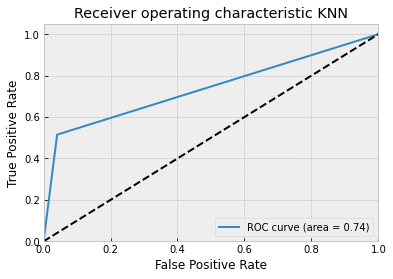

In [ ]:

plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic KNN')
plt.legend(loc="lower right")
plt.show()

#**Random Forest**

In [ ]:
def evaluateModel(y_test, predicted):
    """evaluates trained model"""
    acc = accuracy_score(y_test, predicted) # accuracy
    print("\nAccuracy with validation data: %4.2f%%" %(100*acc))
    print("\nClassification report:\n")
    print(classification_report(y_test, predicted)) 
    cm = confusion_matrix(y_test, predicted) # confusion_matrix
    print("\nConfusion matrix:\n")
    print(pd.DataFrame(cm))
    return acc

models = {} # dictionary of Scikit-Learn classifiers with non-default parameters 
models['RF'] = RandomForestClassifier(n_estimators=100)

result = []
for m in [m for m in models]:
    modelRF = models[m] # model to use
    print("\nTraining classifier %s:\n%s" %(m, modelRF))
    st = time.time() # start time for training and testing
    modelRF.fit(X_train_tfidf, y_train) # train model
    predictedRF = modelRF.predict(X_test_tfidf) # predict test labels with trained modelc
    t = time.time() - st # time to train and test model
    print("Time to train and test classifier: %4.2f seconds" %(t))
    accRF = evaluateModel(y_test, predictedRF) # evaluate prediction accuracy
    result.append([m, accRF]) # record results
    print(60*'=') # end training and testing for model


Training classifier RF:
RandomForestClassifier()
Time to train and test classifier: 5163.84 seconds

Accuracy with validation data: 90.46%

Classification report:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94    108561
           1       0.85      0.78      0.81     38626

    accuracy                           0.90    147187
   macro avg       0.88      0.86      0.87    147187
weighted avg       0.90      0.90      0.90    147187


Confusion matrix:

        0      1
0  103079   5482
1    8557  30069


In [ ]:
cmrf = confusion_matrix(y_test, predictedRF)

Text(0.5, 257.44, 'Predicted label')

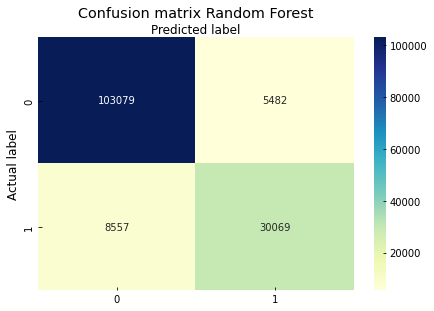

In [ ]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cmrf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#**Decision Tree**

In [ ]:
def evaluateModel(y_test, predicted):
    """evaluates trained model"""
    acc = accuracy_score(y_test, predicted) # accuracy
    print("\nAccuracy with validation data: %4.2f%%" %(100*acc))
    print("\nClassification report:\n")
    print(classification_report(y_test, predicted)) 
    cm = confusion_matrix(y_test, predicted) # confusion_matrix
    print("\nConfusion matrix:\n")
    print(pd.DataFrame(cm))
    return acc

models = {} # dictionary of Scikit-Learn classifiers with non-default parameters 
models['DT'] = DecisionTreeClassifier()

result = []
for m in [m for m in models]:
    model = models[m] # model to use
    print("\nTraining classifier %s:\n%s" %(m, model))
    st = time.time() # start time for training and testing
    model.fit(X_train_tfidf, y_train) # train model
    predicted = model.predict(X_test_tfidf) # predict test labels with trained modelc
    t = time.time() - st # time to train and test model
    print("Time to train and test classifier: %4.2f seconds" %(t))
    accdec = evaluateModel(y_test, predicted) # evaluate prediction accuracy
    result.append([m, acc]) # record results
    print(60*'=') # end training and testing for model


Training classifier DT:
DecisionTreeClassifier()
Time to train and test classifier: 458.36 seconds

Accuracy with validation data: 88.74%

Classification report:

              precision    recall  f1-score   support

           0       0.91      0.94      0.92    108561
           1       0.81      0.74      0.78     38626

    accuracy                           0.89    147187
   macro avg       0.86      0.84      0.85    147187
weighted avg       0.89      0.89      0.89    147187


Confusion matrix:

        0      1
0  102037   6524
1   10055  28571


In [ ]:
cm = confusion_matrix(y_test, predicted)

Text(0.5, 257.44, 'Predicted label')

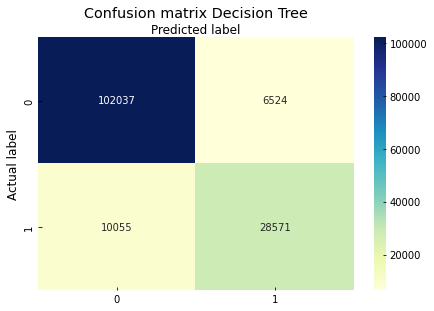

In [ ]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#**Comparison of various models**

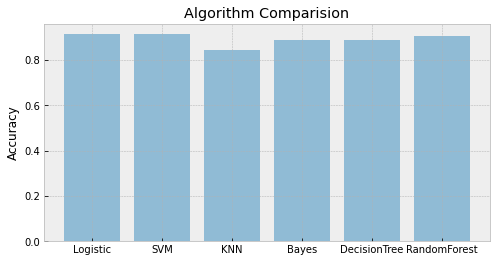

In [ ]:
plt.figure(figsize=(8, 4))  
objects = ('Logistic', 'SVM','KNN','Bayes','DecisionTree','RandomForest')
y_pos = np.arange(len(objects))
performance = [acc,acc3,KNNacc,bayesacc,accdec,accRF]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision')
plt.show()
